In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Set a fixed random seed for reproducibility
np.random.seed(51)
tf.random.set_seed(51)

# load fashion mnist dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train_full = x_train_full.astype("float32") / 255.0 - 0.5
x_test = x_test.astype("float32") / 255.0 - 0.5

x_train_full = np.reshape(x_train_full, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

num_classes = 10
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Shuffle the training data
indices = np.random.permutation(len(x_train_full))
x_train_full = x_train_full[indices]
y_train_full = y_train_full[indices]


# Split the training data into training and validation sets
val_size = 8000
x_val = x_train_full[:val_size]
y_val = y_train_full[:val_size]
x_train = x_train_full[val_size:]
y_train = y_train_full[val_size:]



# for train set: add mirrors of images from 0,2,4, and 6 categories e.g. T-shirt/top, Pullover, Coat, and Shirt
mask = np.isin(np.argmax(y_train, axis=1), [0, 2, 4, 6])
x_train_mirror = np.flip(x_train[mask], axis=2)
x_train_final = np.concatenate([x_train, x_train_mirror], axis=0)
y_train_final = np.concatenate([y_train, y_train[mask]], axis=0)


In [8]:
# Model architecture
model = keras.Sequential([
    
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(rate=0.3),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(rate=0.3),
    
    
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.Dropout(rate=0.3),
    
    layers.Flatten(),
    
    layers.Dense(128, activation="relu"),
    layers.Dropout(rate=0.3),
    
    layers.Dense(num_classes, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])




# Train the model 
batch_size = 512
epochs = 70
with tf.device('/GPU:0'):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_val, y_val))


# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/70
102/102 [==============================] - 3s 26ms/step - loss: 0.9514 - accuracy: 0.6498 - val_loss: 0.5561 - val_accuracy: 0.7854
Epoch 2/70
102/102 [==============================] - 2s 23ms/step - loss: 0.5579 - accuracy: 0.7906 - val_loss: 0.4489 - val_accuracy: 0.8307
Epoch 3/70
102/102 [==============================] - 2s 23ms/step - loss: 0.4807 - accuracy: 0.8217 - val_loss: 0.4019 - val_accuracy: 0.8580
Epoch 4/70
102/102 [==============================] - 2s 22ms/step - loss: 0.4371 - accuracy: 0.8387 - val_loss: 0.3609 - val_accuracy: 0.8724
Epoch 5/70
102/102 [==============================] - 2s 23ms/step - loss: 0.4006 - accuracy: 0.8543 - val_loss: 0.3330 - val_accuracy: 0.8825
Epoch 6/70
102/102 [==============================] - 2s 23ms/step - loss: 0.3737 - accuracy: 0.8634 - val_loss: 0.3189 - val_accuracy: 0.8844
Epoch 7/70
102/102 [==============================] - 2s 24ms/step - loss: 0.3564 - accuracy: 0.8711 - val_loss: 0.3109 - val_accuracy: 0.8857

Epoch 58/70
102/102 [==============================] - 2s 23ms/step - loss: 0.1776 - accuracy: 0.9333 - val_loss: 0.2062 - val_accuracy: 0.9276
Epoch 59/70
102/102 [==============================] - 2s 23ms/step - loss: 0.1751 - accuracy: 0.9335 - val_loss: 0.2067 - val_accuracy: 0.9274
Epoch 60/70
102/102 [==============================] - 2s 23ms/step - loss: 0.1777 - accuracy: 0.9325 - val_loss: 0.2136 - val_accuracy: 0.9255
Epoch 61/70
102/102 [==============================] - 2s 23ms/step - loss: 0.1752 - accuracy: 0.9330 - val_loss: 0.2067 - val_accuracy: 0.9279
Epoch 62/70
102/102 [==============================] - 2s 24ms/step - loss: 0.1789 - accuracy: 0.9316 - val_loss: 0.2075 - val_accuracy: 0.9271
Epoch 63/70
102/102 [==============================] - 2s 23ms/step - loss: 0.1738 - accuracy: 0.9351 - val_loss: 0.2047 - val_accuracy: 0.9274
Epoch 64/70
102/102 [==============================] - 2s 23ms/step - loss: 0.1747 - accuracy: 0.9336 - val_loss: 0.2072 - val_accuracy:

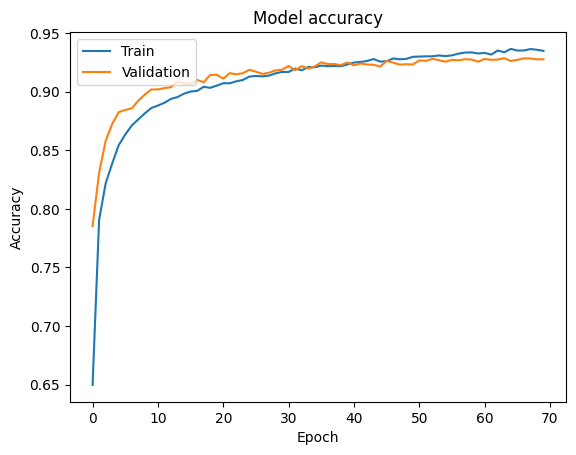

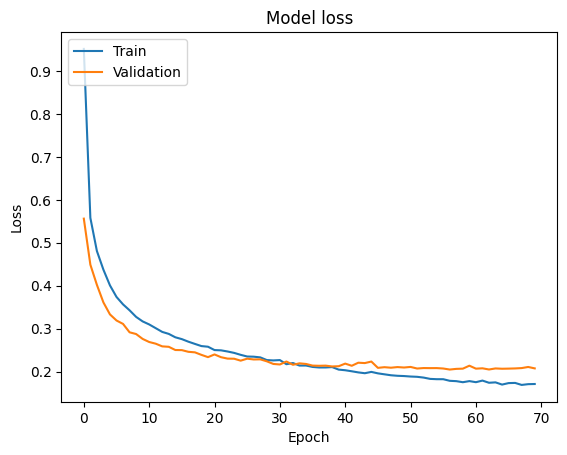

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# ВИСНОВОК: За рахунок використання згорткової мережі вдалося підвищити точність на 3.5% по відношенню до багатошарової мережі